# Particle Filter {-}

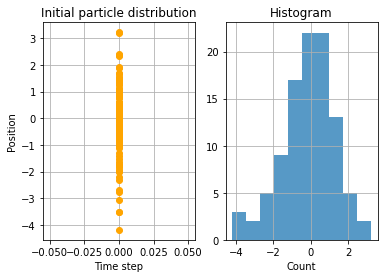

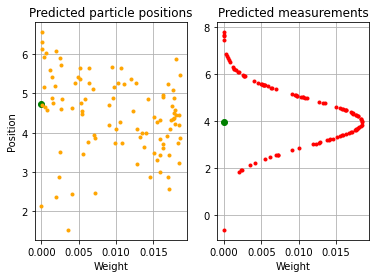

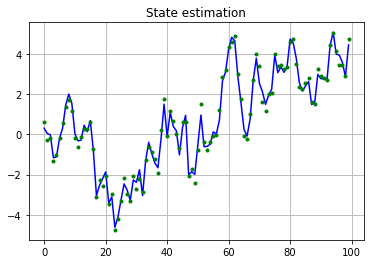

In [1]:
from numpy import arange, array, sqrt, random, sin, cos, zeros, pi, exp, cumsum, mean, var
import matplotlib.pyplot as plt

# System parameters
samples = 100  # Number of samples
dt = 1         # Time interval [second]
n = 100        # Number of particles

# Process noise
Q = 1

# Measurement noise
R = 1

# Initial state
x = 0.1
xt = x

# Initial particle variance
sigmap = 2

# Generate initial n particles
xn = zeros(n)
for i in range(0, n):
    xn[i] = x + random.normal(0, sqrt(sigmap))

# Plot initial particles and corresponding histogram
plt.subplot(1, 2, 1)
plt.title('Initial particle distribution')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.plot(zeros(n), xn, color='orange', marker='o', linestyle='None')
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.xlabel('Count')
plt.hist(xn, align='mid', alpha=0.75)
plt.grid()
plt.show()

# Initialize plot vectors
xt_all = []; x_all = []; z_all = []

def proc(x, Q):
    return x + random.normal(0, sqrt(Q))

def meas(x, R):
    return x + random.normal(0, sqrt(R))

# Main loop
for k in range(0, samples):
    
    # Generate dynamic process
    xt = proc(xt, Q)
    
    # Generate measurement
    z = meas(xt, R)
    
    # Time update (loop over n particles)
    xnp = zeros(n);zp = zeros(n);w = zeros(n)
    for i in range(0, n):
        
        # Predicted state
        xnp[i] = proc(xt, Q)
        
        # Compute measurement
        zp[i] = meas(xnp[i], R)
        
        # Compute weights (normal distributed measurements)
        w[i] = (1/sqrt(2*pi*R))*exp(-(z - zp[i])**2/(2*R))
        
    # Normalize to form probability distribution
    w = w/sum(w)
    
    # Resampling of cumulative probability distribution
    for i in range(0, n):
        ind = [x for x, ind in enumerate(cumsum(w)) if ind <= random.uniform(0, 1)]
        xn[i] = xnp[ind[-1]]  # Find the index of last occurence
    
    # State estimation
    x = mean(xn)
    var_est = var(xn)
    
    # Accumulate plot vectors
    x_all.append(x)
    xt_all.append(xt)
    z_all.append(z)
    

# Plot distributions
plt.subplot(1, 2, 1)
plt.title('Predicted particle positions')
plt.plot(0, x, color='green', marker='o')
plt.plot(w, xnp, color='orange', marker='.', linestyle='None')
plt.xlabel('Weight')
plt.ylabel('Position')
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Predicted measurements')
plt.plot(0, z, color='green', marker='o')
plt.plot(w, zp, color='red', marker='.', linestyle='None')
plt.xlabel('Weight')
plt.grid()
plt.show()

# Time
time = arange(0, samples)*dt

# Plot estimates
plt.title('State estimation')
plt.plot(time, xt_all, color='blue')
plt.plot(time, x_all, 'g.')
plt.grid()
plt.show()